## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np
import random 

np.random.seed(0)

In [2]:
# our toy data for this task
obs  = 20
x    = np.random.uniform(0, 10, size=obs)
temp = 1.3*x + 15 + np.random.normal(0, 1, size=obs)

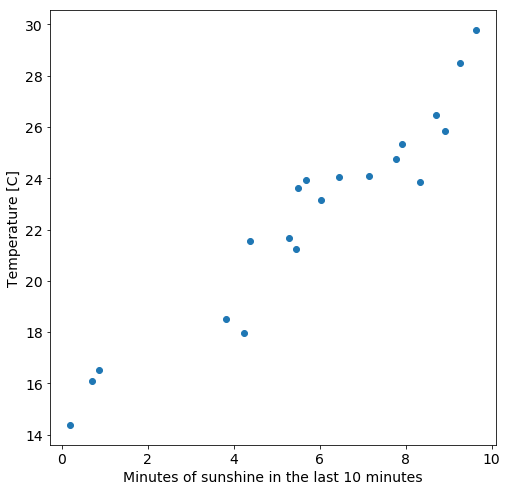

In [3]:
plt.plot(x, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10 minutes")
plt.ylabel("Temperature [C]");

In [4]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        # TODO: for each sample in X return the predicted value, X is a vector!
        # Note: through out the week "TODO:" means something for you to do, and
        # `return None` or `return blah` means the function should return something
        # the None is just a placeholder
        y_pred = X * self.W + self.b
        return y_pred
    
    def grad_loss(self, x, y):
        # TODO: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        grad_W = -2 * ( y - self.predict(x) ) * x
        grad_b = -2 * ( y - self.predict(x) )   
        grads  = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update, update W and b
        grads  = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads['W']
        self.b = self.b - learning_rate * grads['b']
        
    def loss(self, x, y):
        # TODO: compute the loss for the sample x with true value y
        loss = ( y - self.predict(x) )**2
        return None

    def accuracy(self, X, y):
        # TODO: compute accuracy for samples X with true values y
        mse = np.mean( ( y - self.predict(X) )**2 )
        return mse

Questions:

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between SGD and normal GD?

In [5]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

# Train for one epoch
mse = []
W_hat = []
b_hat = []

learning_rate = 0.01
train_acc_0 = lr.accuracy(x, temp)
print("Initial: train accuracy: %0.3f" % (train_acc_0), end=' ')
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b), end='\n')

W_hat.append( lr.W )
b_hat.append( lr.b )


mse.append( train_acc_0 )

epoch_max = 200



for j in range(epoch_max):
    for i, (x_, y_) in enumerate(zip(x, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(x, temp)
        print("Update: train accuracy: %0.3f" % (train_acc), end=' ')
        print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))
        if not (i+1) % (obs):
            print( i )
            mse.append( train_acc )
            W_hat.append( lr.W )
            b_hat.append( lr.b )
            
mse   
W_hat
b_hat

initial value of W: 0.1668 and b: 0.1706
Initial: train accuracy: 471.861 initial value of W: 0.1668 and b: 0.1706
Update: train accuracy: 56.557 value of W: 2.6411 and b: 0.6215
Update: train accuracy: 36.106 value of W: 3.2965 and b: 0.7131
Update: train accuracy: 39.295 value of W: 3.6058 and b: 0.7644
Update: train accuracy: 41.753 value of W: 3.6949 and b: 0.7808
Update: train accuracy: 46.536 value of W: 3.8237 and b: 0.8112
Update: train accuracy: 40.018 value of W: 3.6354 and b: 0.7820
Update: train accuracy: 59.236 value of W: 4.0610 and b: 0.8793
Update: train accuracy: 103.815 value of W: 2.0557 and b: 0.6544
Update: train accuracy: 47.925 value of W: 3.8544 and b: 0.8411
Update: train accuracy: 60.377 value of W: 4.0776 and b: 0.8993
Update: train accuracy: 45.624 value of W: 2.8355 and b: 0.7424
Update: train accuracy: 36.423 value of W: 3.4648 and b: 0.8614
Update: train accuracy: 47.763 value of W: 3.8482 and b: 0.9289
Update: train accuracy: 73.728 value of W: 2.3588 an

[0.1706378696181594,
 1.5515439621754941,
 2.4230365721762199,
 3.234761891103823,
 3.9908187992278341,
 4.6950250559418976,
 5.3509365973438809,
 5.9618654921705119,
 6.5308966663076831,
 7.0609034803278536,
 7.5545622387144249,
 8.0143657040383633,
 8.4426356843277492,
 8.8415347571911003,
 9.2130771898960919,
 9.5591391105454626,
 9.8814679817100135,
 10.181691424356515,
 10.461325436627487,
 10.721782048974154,
 10.964376454297657,
 11.190333649102657,
 11.400794619198226,
 11.596822101181239,
 11.779405948795128,
 11.949468131261877,
 12.107867388826609,
 12.255403569023315,
 12.392821665557888,
 12.520815580203145,
 12.640031626701768,
 12.751071794370306,
 12.85449678788407,
 12.950828858592505,
 13.040554441661943,
 13.124126612362154,
 13.201967373899928,
 13.274469788352167,
 13.341999961458882,
 13.404898891298343,
 13.463484190179447,
 13.518051688446084,
 13.568876928292047,
 13.61621655512957,
 13.660309613537317,
 13.70137875433181,
 13.739631358857459,
 13.7752605861723

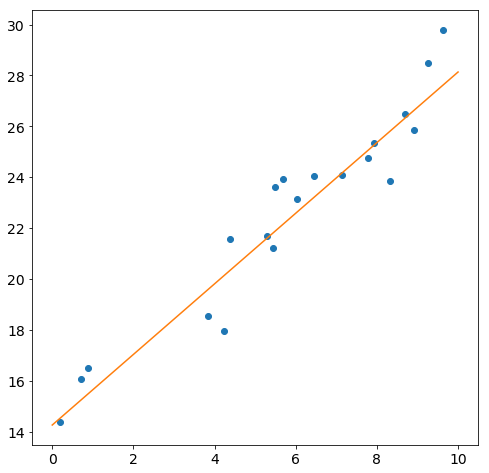

In [6]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr.predict(line));

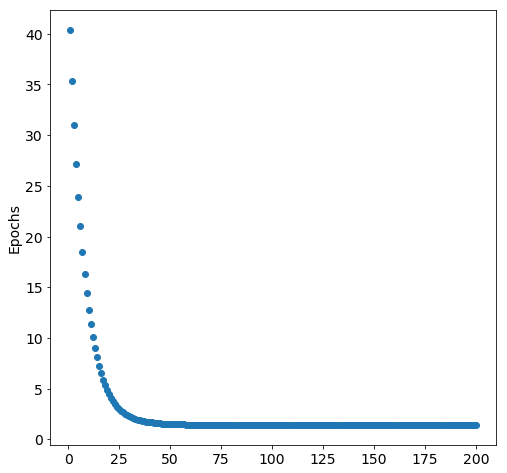

In [7]:
epoch = range( len(mse) )
plt.plot(epoch[1:], mse[1:], 'o')
plt.ylabel("MSE");
plt.ylabel("Epochs");

In [8]:
# do SGD
W_hat_sgd = []
b_hat_sgd = []
mse_sgd = []

lr_sgd = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b))

W_hat_sgd.append( lr_sgd.W )
b_hat_sgd.append( lr_sgd.b )

learning_rate = 0.01
train_acc_0 = lr_sgd.accuracy(x, temp)
print("Initial: train accuracy: %0.3f" % (train_acc_0), end=' ')
print('initial value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b), end='\n')

mse_sgd.append( train_acc_0 )

K = 7#number of observations stochastically selected

for j in range(epoch_max):
    indices = random.sample(range(obs), K)
    count   = 0
    for i, (x_, y_) in enumerate(zip(x, temp)): # Train for one epoch
        #print(i)
        #randomly select observations  for parameter updates
        if i in indices:
            print(i)
            count += 1
            #print('count: %i' % count )
            lr_sgd.train(x_, y_, learning_rate)
            train_acc = lr_sgd.accuracy(x, temp)
            print("Update: train accuracy: %0.3f" % (train_acc), end=' ')
            print('value of W: %.4f and b: %.4f' % (lr_sgd.W, lr_sgd.b))
            #collect MSE for the last observation in each epoch
            if not count % K:
                print( count )
                mse_sgd.append( train_acc )
                W_hat_sgd.append( lr_sgd.W )
                b_hat_sgd.append( lr_sgd.b )
mse_sgd        

initial value of W: -0.2896 and b: -0.3711
Initial: train accuracy: 629.130 initial value of W: -0.2896 and b: -0.3711
0
Update: train accuracy: 71.446 value of W: 2.5191 and b: 0.1407
4
Update: train accuracy: 41.068 value of W: 3.1242 and b: 0.2835
5
Update: train accuracy: 39.808 value of W: 3.5877 and b: 0.3553
6
Update: train accuracy: 58.273 value of W: 4.0689 and b: 0.4653
8
Update: train accuracy: 100.113 value of W: 2.1650 and b: 0.2677
16
Update: train accuracy: 89.590 value of W: 2.2203 and b: 0.5411
19
Update: train accuracy: 36.349 value of W: 3.3702 and b: 0.6733
7
0
Update: train accuracy: 48.057 value of W: 3.8597 and b: 0.7624
2
Update: train accuracy: 43.755 value of W: 3.7538 and b: 0.7449
6
Update: train accuracy: 64.072 value of W: 4.1373 and b: 0.8325
7
Update: train accuracy: 108.968 value of W: 2.0190 and b: 0.5950
12
Update: train accuracy: 35.622 value of W: 3.3657 and b: 0.8321
14
Update: train accuracy: 37.399 value of W: 3.5483 and b: 1.0892
17
Update: trai

[629.13019278688148,
 36.348669595776968,
 66.37425866675062,
 88.005861737636479,
 38.057544864112899,
 34.232649992595384,
 31.076543372347544,
 27.054411479706868,
 28.006693835484931,
 25.249940664038327,
 34.87621875275233,
 28.257441963611711,
 37.89156237368001,
 23.212483616795001,
 39.190566669528508,
 17.690596086429519,
 18.428328783701751,
 17.737362982880718,
 16.476140127030462,
 20.442673147964328,
 12.446133608202411,
 36.499912515339751,
 18.241678675565659,
 10.884495715615696,
 33.075721249516121,
 12.771137048107786,
 20.229177875901055,
 10.194531797321703,
 33.13909451255396,
 9.0040463802962485,
 9.5966044652610556,
 9.9937412505087853,
 19.11308611869547,
 13.041143378743442,
 13.387149400334502,
 8.1376882170232765,
 6.4175789822554039,
 8.3853981003846094,
 6.1787219477858262,
 4.9359740277679069,
 11.704411428800503,
 10.451116489153319,
 4.3132168630927206,
 13.718817487914411,
 11.72431917776291,
 4.4286401290695849,
 4.8412398426593075,
 5.5435876310124339

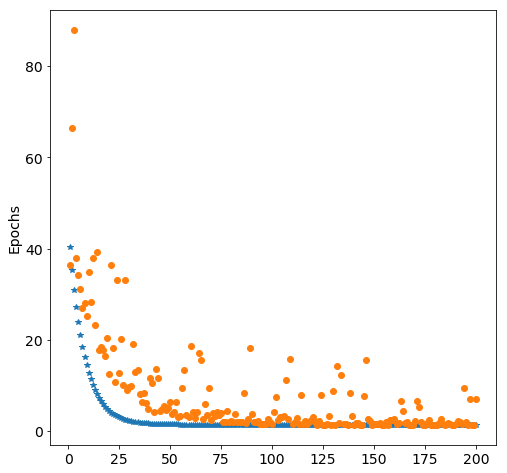

In [9]:
epoch = range( len(mse_sgd) )
plt.plot(epoch[1:], mse[1:], '*')
plt.plot(epoch[1:], mse_sgd[1:], 'o')
plt.ylabel("MSE");
plt.ylabel("Epochs");

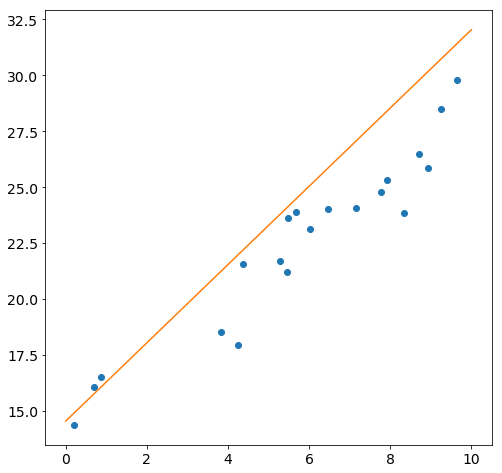

In [10]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr_sgd.predict(line));

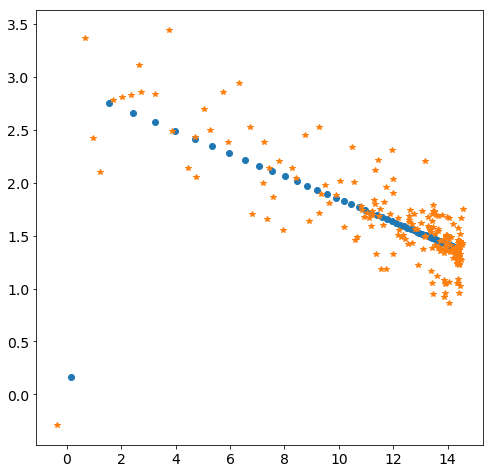

In [11]:
#plot convergence path
plt.plot( b_hat, W_hat, 'o')
plt.plot( b_hat_sgd, W_hat_sgd, '*')
None

In [12]:
W_hat_sgd

[-0.2896174389261591,
 3.3701981170847999,
 2.4176410654779215,
 2.104067755308229,
 2.7814073576867195,
 2.8133014134874434,
 2.8327241068523539,
 3.1080940185898394,
 2.8590587649240558,
 2.8413801862127994,
 3.4456426411215264,
 2.4883890734131326,
 2.1402913819935092,
 2.4324822361618819,
 2.0568489618883108,
 2.6946520747414384,
 2.494750475358364,
 2.8592635767285266,
 2.3842574926817877,
 2.9437041304754685,
 2.525352336148257,
 1.7021511054364298,
 1.9957646788972769,
 2.3890156101471698,
 1.6571593704322933,
 2.1427783228917878,
 1.8624303358333159,
 2.2041813896871143,
 1.5494378871761378,
 2.1374770427609873,
 2.0459956175407337,
 2.4475752442539878,
 1.6350857547498461,
 2.5268504902095876,
 1.7096819202530478,
 1.8937059804534577,
 1.9802371779189296,
 1.8091626759660762,
 1.8833505348236772,
 2.0183331967681779,
 1.5820983769451922,
 2.3389141021224238,
 2.0071208599393406,
 1.4578042801787705,
 1.4912085478361692,
 1.7823897891607055,
 1.7386408768231167,
 1.673963801471